In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# 1. Load the dataset
df = pd.read_csv('titanic.csv')

# 2. Understand the data
print("Shape of Data:", df.shape)
print("\nInfo:")
print(df.info())
print("\nDescribe:")
print(df.describe(include='all'))

# 3. Fill missing Age using SimpleImputer
age_imputer = SimpleImputer(strategy='mean')
df['Age'] = age_imputer.fit_transform(df[['Age']])

# 4. Fill missing Cabin with "Unknown"
df['ticket'] = df['ticket'].fillna('ticket')

# 5. Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# 6. Analyse passenger Class using countplot
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# 7. Female passengers who survived
female_survivors = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]
print("\nFemale passengers who survived:")
print(female_survivors[['Name', 'Survived']])

# 8. Passengers in 3rd class and under 18
third_class_under_18 = df[(df['Pclass'] == 3) & (df['Age'] < 18)]
print("\n3rd Class passengers under age 18:")
print(third_class_under_18[['Name', 'Age', 'Pclass']])

# 9. Passengers in 1st class and older than 40
class1_above_40 = df[(df['Pclass'] == 1) & (df['Age'] > 40)]
print("\nClass 1 passengers older than 40:")
print(class1_above_40[['Name', 'Age', 'Pclass']])

# 10. Survived passengers in above category
survived_class1_above_40 = class1_above_40[class1_above_40['Survived'] == 1]
print("\nSurvived Class 1 passengers older than 40:")
print(survived_class1_above_40[['Name', 'Age', 'Survived']])

# 11. Male passengers who paid fare > 100
males_paid_over_100 = df[(df['Sex'] == 'male') & (df['Fare'] > 100)]
print("\nMale passengers who paid fare > 100:")
print(males_paid_over_100[['Name', 'Fare', 'Sex']])

# 12. Passengers who embarked from 'C' and were in Class 2
embarked_c_class2 = df[(df['Embarked'] == 'C') & (df['Pclass'] == 2)]
print("\nPassengers embarked from 'C' and in Class 2:")
print(embarked_c_class2[['Name', 'Embarked', 'Pclass']])

# 13. Passengers with more than 2 siblings/spouses aboard
more_than_2_sibsp = df[df['SibSp'] > 2]
print("\nPassengers with SibSp > 2:")
print(more_than_2_sibsp[['Name', 'SibSp']])

# 14. Passengers who did not survive and had no family aboard
no_family_not_survived = df[(df['Survived'] == 0) & (df['SibSp'] == 0) & (df['Parch'] == 0)]
print("\nPassengers who did not survive and had no family aboard:")
print(no_family_not_survived[['Name', 'Survived', 'SibSp', 'Parch']])

# 15. Top 5 oldest passengers who survived
oldest_survivors = df[df['Survived'] == 1].sort_values(by='Age', ascending=False).head(5)
print("\nTop 5 oldest passengers who survived:")
print(oldest_survivors[['Name', 'Age', 'Survived']])

# 16. Passengers who paid zero fare
zero_fare_passengers = df[df['Fare'] == 0]
print("\nPassengers who paid zero fare:")
print(zero_fare_passengers[['Name', 'Fare']])

# 17. Split dataset for training and testing
# Drop columns not needed for ML model (example)
X = df.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])  # drop text-heavy or irrelevant
X = pd.get_dummies(X, drop_first=True)  # convert categorical to numerical
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [19]:
df = pd.read_csv(r'C:\Users\Tcs\Downloads\Titanic.csv')


In [21]:
print("Shape of Data:", df.shape)
print("\nInfo:")
print(df.info())
print("\nDescribe:")
print(df.describe(include='all'))

Shape of Data: (1000, 11)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1000 non-null   int64  
 1   Pclass       1000 non-null   int64  
 2   Name         1000 non-null   object 
 3   Sex          1000 non-null   object 
 4   Age          1000 non-null   int64  
 5   SibSp        1000 non-null   int64  
 6   Parch        1000 non-null   int64  
 7   Ticket       1000 non-null   object 
 8   Fare         1000 non-null   float64
 9   Embarked     1000 non-null   object 
 10  Survived     1000 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 86.1+ KB
None

Describe:
        PassengerId       Pclass            Name   Sex          Age  \
count   1000.000000  1000.000000            1000  1000  1000.000000   
unique          NaN          NaN             995     2          NaN   
top             NaN    

In [25]:
age_imputer = SimpleImputer(strategy='mean')
df['Age'] = age_imputer.fit_transform(df[['Age']])

In [29]:
print(df.columns)



Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived'],
      dtype='object')


In [35]:
df['Ticket'] = df['Ticket'].fillna('Ticket')

In [37]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

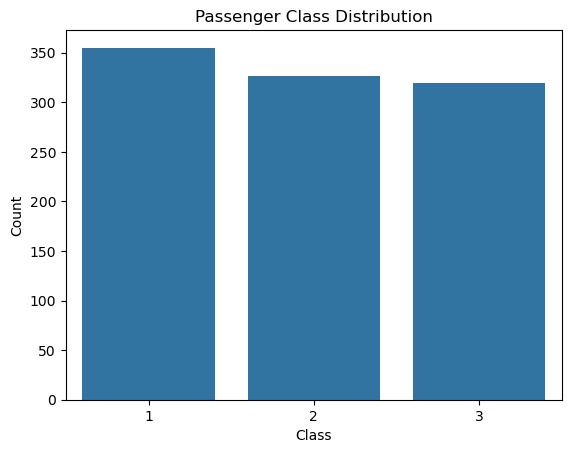

In [39]:
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [41]:
female_survivors = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]
print("\nFemale passengers who survived:")
print(female_survivors[['Name', 'Survived']])


Female passengers who survived:
                     Name  Survived
4         Cristian Santos         1
6         Abigail Shaffer         1
9              Ryan Munoz         1
12           Lisa Hensley         1
20   Margaret Hawkins DDS         1
..                    ...       ...
982         Joshua Garcia         1
988          Anna Wheeler         1
991          Brian Harris         1
993      Deborah Campbell         1
994     Anthony Armstrong         1

[229 rows x 2 columns]


In [43]:
third_class_under_18 = df[(df['Pclass'] == 3) & (df['Age'] < 18)]
print("\n3rd Class passengers under age 18:")
print(third_class_under_18[['Name', 'Age', 'Pclass']])


3rd Class passengers under age 18:
                  Name   Age  Pclass
0         Allison Hill  17.0       3
34      Debra Davidson   7.0       3
36        Sherri Baker  11.0       3
55       Michael Lewis   2.0       3
70    Jordan Henderson   3.0       3
..                 ...   ...     ...
932       Joel Jackson  10.0       3
950      Rebecca Kelly   3.0       3
953      Alyssa Haynes   4.0       3
993   Deborah Campbell   9.0       3
997  Christina Johnson  10.0       3

[75 rows x 3 columns]


In [45]:
class1_above_40 = df[(df['Pclass'] == 1) & (df['Age'] > 40)]
print("\nClass 1 passengers older than 40:")
print(class1_above_40[['Name', 'Age', 'Pclass']])


Class 1 passengers older than 40:
                 Name   Age  Pclass
1         Noah Rhodes  60.0       1
4     Cristian Santos  70.0       1
25         Judy Baker  50.0       1
43   Anthony Humphrey  58.0       1
53         Mark Perez  75.0       1
..                ...   ...     ...
963        Tom Foster  63.0       1
974     Taylor Taylor  55.0       1
975      Cynthia Haas  55.0       1
981     Stacey Snyder  45.0       1
984       Carla Jones  70.0       1

[162 rows x 3 columns]


In [47]:
survived_class1_above_40 = class1_above_40[class1_above_40['Survived'] == 1]
print("\nSurvived Class 1 passengers older than 40:")
print(survived_class1_above_40[['Name', 'Age', 'Survived']])


Survived Class 1 passengers older than 40:
                 Name   Age  Survived
4     Cristian Santos  70.0         1
53         Mark Perez  75.0         1
57    Richard Aguirre  78.0         1
69      William Baker  69.0         1
95     Anna Henderson  71.0         1
..                ...   ...       ...
917  Christine Parker  54.0         1
927  Jacqueline Mccoy  56.0         1
952       Renee Wolfe  55.0         1
963        Tom Foster  63.0         1
984       Carla Jones  70.0         1

[77 rows x 3 columns]


In [49]:
males_paid_over_100 = df[(df['Sex'] == 'male') & (df['Fare'] > 100)]
print("\nMale passengers who paid fare > 100:")
print(males_paid_over_100[['Name', 'Fare', 'Sex']])


Male passengers who paid fare > 100:
                  Name    Fare   Sex
0         Allison Hill  144.08  male
1          Noah Rhodes  249.04  male
3        Daniel Wagner  235.20  male
5      Connie Lawrence  412.97  male
8      Gabrielle Davis  234.63  male
..                 ...     ...   ...
989      Karen Johnson  407.81  male
992      Michael Bowen  337.75  male
997  Christina Johnson  444.22  male
998       Edgar Miller  234.67  male
999  Elizabeth Sanders  286.65  male

[433 rows x 3 columns]


In [51]:
embarked_c_class2 = df[(df['Embarked'] == 'C') & (df['Pclass'] == 2)]
print("\nPassengers embarked from 'C' and in Class 2:")
print(embarked_c_class2[['Name', 'Embarked', 'Pclass']])


Passengers embarked from 'C' and in Class 2:
                  Name Embarked  Pclass
14        Dylan Miller        C       2
16          Holly Wood        C       2
19          Carla Gray        C       2
22         Ethan Adams        C       2
23        Tommy Walter        C       2
..                 ...      ...     ...
965      Travis Conner        C       2
969        Eric Barker        C       2
978       Derek Wright        C       2
994  Anthony Armstrong        C       2
996     Edward Stanley        C       2

[101 rows x 3 columns]


In [53]:
more_than_2_sibsp = df[df['SibSp'] > 2]
print("\nPassengers with SibSp > 2:")
print(more_than_2_sibsp[['Name', 'SibSp']])


Passengers with SibSp > 2:
                  Name  SibSp
0         Allison Hill      4
3        Daniel Wagner      4
6      Abigail Shaffer      4
8      Gabrielle Davis      4
14        Dylan Miller      4
..                 ...    ...
993   Deborah Campbell      4
996     Edward Stanley      4
997  Christina Johnson      4
998       Edgar Miller      3
999  Elizabeth Sanders      3

[418 rows x 2 columns]


In [55]:
no_family_not_survived = df[(df['Survived'] == 0) & (df['SibSp'] == 0) & (df['Parch'] == 0)]
print("\nPassengers who did not survive and had no family aboard:")
print(no_family_not_survived[['Name', 'Survived', 'SibSp', 'Parch']])


Passengers who did not survive and had no family aboard:
                  Name  Survived  SibSp  Parch
144       Amber Wright         0      0      0
202  Elizabeth Perkins         0      0      0
226        Kirk Carter         0      0      0
241       Matthew Moon         0      0      0
253     Barbara Dudley         0      0      0
276       Wayne Morgan         0      0      0
422   Michael Mitchell         0      0      0
431         Jack White         0      0      0
438      Rhonda Martin         0      0      0
462       Riley Bryant         0      0      0
469  Jeanette Harrison         0      0      0
507          Emma Reed         0      0      0
534   Anthony Gonzales         0      0      0
541         Sean Moore         0      0      0
561       Kim Erickson         0      0      0
639     Janet Kane DVM         0      0      0
675       Larry Harris         0      0      0
775  Christopher Moore         0      0      0
944   Francis Robinson         0      0      0


In [57]:
oldest_survivors = df[df['Survived'] == 1].sort_values(by='Age', ascending=False).head(5)
print("\nTop 5 oldest passengers who survived:")
print(oldest_survivors[['Name', 'Age', 'Survived']])


Top 5 oldest passengers who survived:
                    Name   Age  Survived
731      Alexander Gomez  79.0         1
673       Timothy Hayden  79.0         1
300  Tanner Mitchell DDS  79.0         1
232   Christopher Parker  79.0         1
876        Michael Miles  79.0         1


In [59]:
zero_fare_passengers = df[df['Fare'] == 0]
print("\nPassengers who paid zero fare:")
print(zero_fare_passengers[['Name', 'Fare']])


Passengers who paid zero fare:
Empty DataFrame
Columns: [Name, Fare]
Index: []


In [63]:
X = df.drop(columns=['Survived', 'Name', 'Ticket'])  # drop text-heavy or irrelevant
X = pd.get_dummies(X, drop_first=True)  # convert categorical to numerical
y = df['Survived']